In [1]:
from sklearn.linear_model import LinearRegression

import numpy as np
import matplotlib.pyplot as plt

RANDOM_SEED = 0x0

Erstellen von Daten:

In [2]:
np.random.seed(seed=RANDOM_SEED)

x = np.random.normal(0, 1, 100).reshape(-1, 1)
y = 3*x**3 + 2*x**2 + x + np.random.normal(0, 10, 100).reshape(-1, 1)

Visualisierung der Daten:

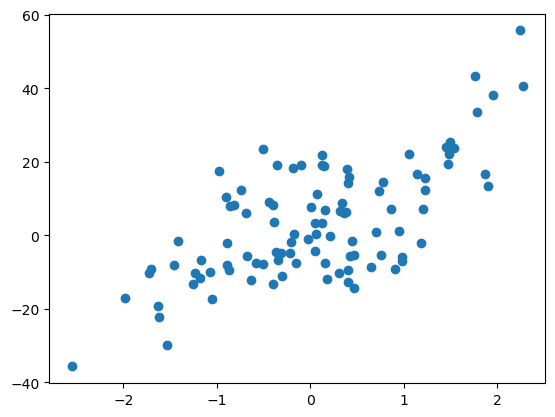

In [3]:
plt.scatter(x, y)
plt.show()

Nun trennen wir die Daten in Trainings- und Testdaten auf:

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_SEED)

Um mit LinearRegression von sklearn.linear_model ein polynomiales Modell zu erstellen müssen wir zuerst die Daten aufbereiten:

1. Daten sortieren:

In [5]:
# erstellen des Sortierungsindex
sort_idx = np.argsort(X_train.squeeze())

# Trainingsdaten sortieren mithilfe des Sortierungsindex
sorted_X_train = X_train[sort_idx].squeeze().reshape(len(X_train), 1)
sorted_y_train = y_train[sort_idx].squeeze().reshape(len(y_train), 1)

2. Trainingsdaten in polynomiale Daten zusammenfügen:

In [6]:
# Die zu erzeugende Matrix soll wie folgt aussehen:
# [[1, x1, x1^2],
#  [1, x2, x2^2],
#  ...,
#  [1, xn, xn^2]]

stacked_X_train = np.column_stack((np.ones_like(X_train), sorted_X_train, sorted_X_train**2))

Nun können wir die Daten in das Modell fitten:

In [7]:
LinReg = LinearRegression()
LinReg.fit(stacked_X_train, sorted_y_train)

# mit dem Model vorhersagen wir nun die y Werte
y_pred_py = LinReg.predict(stacked_X_train)

Jetzt setzten wir eine eigene Implementation um basierend auf der Formel:<br>
$\Theta = (X^T * X)^{-1} * X^T * y$

In [21]:
class OwnLinearRegression:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X_param, y_param):
        theta_best = np.linalg.inv(X_param.T @ X_param) @ X_param.T @ y_param

        self.intercept_ = theta_best[0]
        self.coef_ = theta_best[1:]

    def predict(self, X_param):
        X = X_param
        # checks if first column is all ones
        if np.all(X_param[:, 0] == 1):
            # removes the first column
            X = X_param.copy()[:, 1:]

        return X @ self.coef_ + self.intercept_

    def show(self):
        print(self.coef_)
        print("\n")
        print(self.intercept_)

Jetzt bauen wir das Modell mit unserer eigenen Variante auf:

In [23]:
OwnLinReg = OwnLinearRegression()
OwnLinReg.fit(stacked_X_train, sorted_y_train)

y_pred_own = OwnLinReg.predict(stacked_X_train)

Jetzt stellen wir die Daten und Regressionsmodelle an:

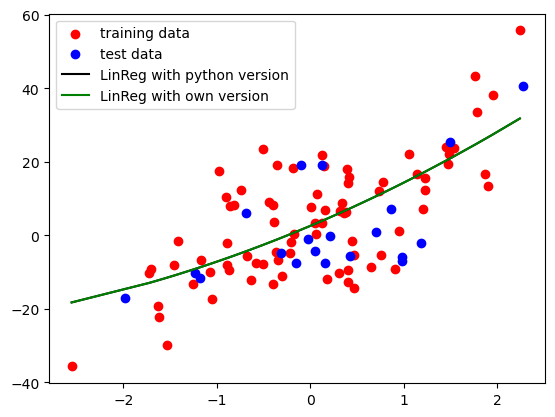

In [24]:
plt.scatter(X_train, y_train, color="red", label="training data")
plt.scatter(X_test, y_test, color="blue", label="test data")
plt.plot(sorted_X_train, y_pred_py, color="black", label="LinReg with python version")
plt.plot(sorted_X_train, y_pred_own, color="green", label="LinReg with own version")
plt.legend()
plt.show()